In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os

# Define paths
zip_path = "/content/drive/My Drive/HouseGAN/dataset_paper.zip"  # CHANGE THIS to match your file
extract_path = "/content/dataset"  # Where to extract in Colab

# Extract ZIP
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted successfully!")

✅ Dataset extracted successfully!


In [3]:
!ls /content/dataset

train_data.npy	valid_data.npy


In [4]:
import glob

npy_files = glob.glob("/content/dataset/*.npy")  # Adjust path if needed
print("Found .npy files:", npy_files)

Found .npy files: ['/content/dataset/train_data.npy', '/content/dataset/valid_data.npy']


In [5]:
import numpy as np
import os

# Define paths to the .npy files
train_path = "/content/dataset/train_data.npy"
valid_path = "/content/dataset/valid_data.npy"

# Check if files exist
if os.path.exists(train_path) and os.path.exists(valid_path):
    print("Both .npy files found!")
else:
    print("One or both .npy files are missing!")

# Load data
train_data = np.load(train_path, allow_pickle=True)
valid_data = np.load(valid_path, allow_pickle=True)

print("📂 Train Data Shape:", train_data.shape if hasattr(train_data, 'shape') else "Unknown (Pickled Object)")
print("📂 Valid Data Shape:", valid_data.shape if hasattr(valid_data, 'shape') else "Unknown (Pickled Object)")

# Print first few entries from each dataset (adjust based on data type)
print("\n🔹 Train Data Preview:\n", train_data[:5])
print("\n🔹 Valid Data Preview:\n", valid_data[:5])

Both .npy files found!
📂 Train Data Shape: Unknown (Pickled Object)
📂 Valid Data Shape: Unknown (Pickled Object)

🔹 Train Data Preview:
 [[[6, 2, 4, 4, 6, 7], [array([ 3, 37, 51, 47]), array([  3,  37,  75, 228]), array([ 3, 49, 38, 87]), array([  3, 111,  37, 130]), array([ 39, 111,  54, 130]), array([  3, 230,  24, 242])], [None, None, None, None, None, None]], [[4, 2, 4, 6, 3, 7], [array([ 93,  31, 127,  76]), array([129,  31, 163, 124]), array([ 93,  78, 127, 100]), array([ 93, 102, 127, 124]), array([ 93, 126, 163, 220]), array([ 93, 222, 163, 243])], [None, None, None, None, None, None]], [[2, 4, 4, 3, 6, 7], [array([ 59,  33, 101, 114]), array([ 97,  48, 115,  75]), array([ 88,  77, 115, 114]), array([ 59, 116, 115, 221]), array([ 88, 116, 115, 133]), array([ 59, 223, 115, 240])], [None, None, None, None, None, None]], [[4, 2, 2, 4, 2, 3, 3, 6, 6, 7], [array([32, 31, 83, 69]), array([ 85,  31, 110,  69]), array([112,  31, 216, 136]), array([ 32,  71,  56, 109]), array([ 58,  71,

In [6]:
print("Type of train_data:", type(train_data))
print("Type of first element:", type(train_data[0]))
print("First element preview:", train_data[0])

Type of train_data: <class 'list'>
Type of first element: <class 'list'>
First element preview: [[6, 2, 4, 4, 6, 7], [array([ 3, 37, 51, 47]), array([  3,  37,  75, 228]), array([ 3, 49, 38, 87]), array([  3, 111,  37, 130]), array([ 39, 111,  54, 130]), array([  3, 230,  24, 242])], [None, None, None, None, None, None]]


In [7]:
import numpy as np

# Extract the second sublist (array data) from the first sample
coordinates = train_data[0][1]

# Convert list of arrays into a NumPy array
coordinates_array = np.array(coordinates, dtype=object)  # Keep dtype=object for variable lengths

print("Extracted Coordinates:", coordinates_array)
print("Shape of extracted data:", coordinates_array.shape)

Extracted Coordinates: [[3 37 51 47]
 [3 37 75 228]
 [3 49 38 87]
 [3 111 37 130]
 [39 111 54 130]
 [3 230 24 242]]
Shape of extracted data: (6, 4)


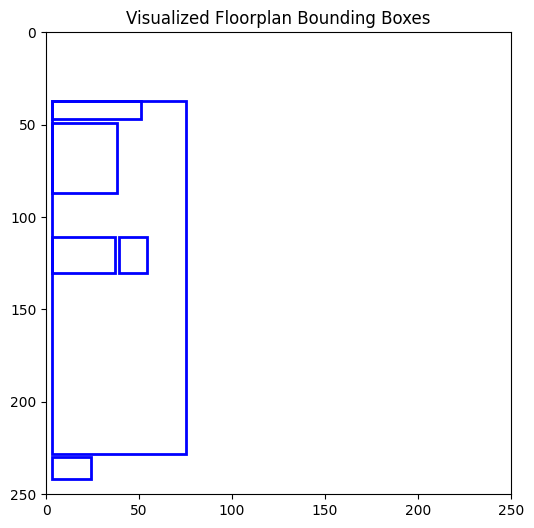

In [8]:
import matplotlib.pyplot as plt

# Convert array data into a format for visualization
fig, ax = plt.subplots(figsize=(6, 6))

# Loop through extracted coordinate arrays and plot them
for box in coordinates:
    if isinstance(box, np.ndarray) and len(box) == 4:  # Ensure it's a valid bounding box
        x1, y1, x2, y2 = box  # Extract coordinates
        ax.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor='blue', linewidth=2))

ax.set_xlim(0, 250)  # Adjust limits based on dataset range
ax.set_ylim(250, 0)  # Reverse Y-axis for correct orientation
plt.title("Visualized Floorplan Bounding Boxes")
plt.show()


In [9]:
# Remove None values from the third sublist
filtered_data = [item for item in train_data[0][2] if item is not None]
print("Filtered Data (Removed None):", filtered_data)

Filtered Data (Removed None): []


In [24]:
!git clone https://github.com/pmh47/House-GAN.git
%cd House-GAN
!pip install torch torchvision networkx matplotlib numpy

Cloning into 'House-GAN'...
fatal: could not read Username for 'https://github.com': No such device or address


In [11]:
import numpy as np

# Define dataset paths
train_file = "/content/dataset/train_data.npy"
valid_file = "/content/dataset/valid_data.npy"

# Load the .npy files
train_data = np.load(train_file, allow_pickle=True)
valid_data = np.load(valid_file, allow_pickle=True)

# Print basic info
print("✅ Train Data Loaded! Shape:", len(train_data))  # Length since it's a list
print("✅ Valid Data Loaded! Shape:", len(valid_data))

# Preview first sample
print("\n🔹 First Train Sample:", train_data[0])
print("\n🔹 First Valid Sample:", valid_data[0])


✅ Train Data Loaded! Shape: 118012
✅ Valid Data Loaded! Shape: 29504

🔹 First Train Sample: [[6, 2, 4, 4, 6, 7], [array([ 3, 37, 51, 47]), array([  3,  37,  75, 228]), array([ 3, 49, 38, 87]), array([  3, 111,  37, 130]), array([ 39, 111,  54, 130]), array([  3, 230,  24, 242])], [None, None, None, None, None, None]]

🔹 First Valid Sample: [[3, 3, 1, 6, 6, 4, 4, 1, 4, 6, 3, 7], [array([ 21,   9, 109,  80]), array([111,   9, 172,  80]), array([ 21,  27, 129, 100]), array([ 84,  61, 109,  80]), array([131,  82, 172, 100]), array([ 21, 101,  60, 133]), array([ 62, 101,  90, 143]), array([ 92, 101, 172, 217]), array([ 21, 135,  60, 161]), array([ 62, 145,  90, 161]), array([ 21, 163,  90, 217]), array([ 21, 219, 172, 251])], [None, None, None, None, None, None, None, None, None, None, None, None]]


Processed 0 nodes...
Graph created with 100 nodes in 0.00 seconds!
Nodes: 100
Edges: 99


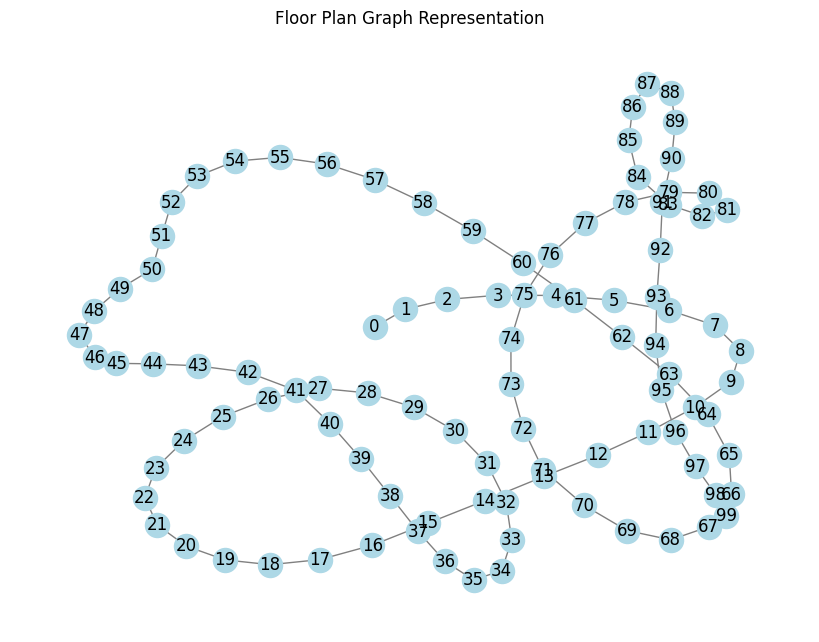

In [14]:
import numpy as np
import networkx as nx
import time

# Load dataset (Check path)
train_file = "/content/dataset/train_data.npy"
train_data = np.load(train_file, allow_pickle=True)

# Limit data for faster testing
MAX_NODES = 100 # Reduce for testing, increase for full dataset

# Function to create graph efficiently
def create_graph_from_npy(data, max_nodes=MAX_NODES):
    G = nx.Graph()

    start_time = time.time()  # Measure execution time

    for idx, sample in enumerate(data[:max_nodes]):  # Process only MAX_NODES
        if len(sample) < 2:
            continue  # Skip malformed entries

        room_type = sample[0]  # Assuming first element is room type
        G.add_node(idx, label=room_type)  # Add node

        if idx > 0:
            G.add_edge(idx - 1, idx)  # Connect nodes sequentially

        if idx % 100 == 0:  # Print progress every 100 nodes
            print(f"Processed {idx} nodes...")

    print(f"Graph created with {G.number_of_nodes()} nodes in {time.time() - start_time:.2f} seconds!")
    return G

# Create graph with optimized execution
G = create_graph_from_npy(train_data)

# Summary
print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())

# Optional: Visualize first few nodes
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray")
plt.title("Floor Plan Graph Representation")
plt.show()


In [32]:
!git clone https://github.com/ennauata/housegan.git
import os
os.chdir("/content/housegan")

fatal: destination path 'housegan' already exists and is not an empty directory.


In [34]:
!pip install -r requirements.txt
!ls /content/housegan/

  Using cached Pillow-7.2.0.tar.gz (39.1 MB)
  Preparing metadata (setup.py) ... done
  Using cached imageio-2.9.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached networkx-2.4-py3-none-any.whl.metadata (4.9 kB)
  Using cached numpy-1.18.3.zip (5.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
compatibility_figure.py    main.py		 utils.py
compute_FID.py		   models.py		 variation_bbs.py
data_stats.py		   __pycache__		 variation_bbs_with_target_grap

In [36]:
!apt-get update
!apt-get install -y graphviz libgraphviz-dev pkg-config

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,692 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,237 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,763 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports InRe

In [37]:
!pip install --no-binary :all: pygraphviz

  Using cached pygraphviz-1.14.tar.gz (106 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.14-cp311-cp311-linux_x86_64.whl size=169716 sha256=c160b3dc8d25d573bb2417568bbdaf7a249d13f19ecfb1278c2cc132185ecd06
  Stored in directory: /root/.cache/pip/wheels/9c/5f/df/6fffd2a4353f26dbb0e3672a1baf070c124a1d74a5f9318279
Successfully built pygraphviz


In [38]:
import pygraphviz as pgv
print("✅ PyGraphviz installed successfully!")

✅ PyGraphviz installed successfully!


In [41]:
!grep -r "class HouseGAN" /content/housegan/

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
import main
from tqdm import tqdm  # For progress bar

# Device setup
device = "cuda" if torch.cuda.is_available() else "cpu"

# Initialize HouseGAN (Modify this based on actual input requirements)
model = HouseGAN(input_dim=256).to(device)  # Adjust input_dim if needed

# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# Placeholder for data preprocessing (convert G to tensor)
def preprocess_graph(G):
    # Convert G (networkx graph) into a PyTorch tensor (modify based on dataset structure)
    return torch.randn((1, 256)).to(device)  # Example random tensor for now

# Placeholder for target (modify as per dataset)
def get_target():
    return torch.randn((1, 256)).to(device)  # Example random target tensor

# Training loop
num_epochs = 10
for epoch in tqdm(range(num_epochs), desc="Training Progress"):
    optimizer.zero_grad()

    input_tensor = preprocess_graph(G)  # Convert G to tensor
    target = get_target()  # Get corresponding target tensor

    output = model(input_tensor)  # Forward pass
    loss = loss_fn(output, target)  # Compute loss

    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}: Loss = {loss.item():.6f}")


usage: colab_kernel_launcher.py [-h] [--n_epochs N_EPOCHS] [--batch_size BATCH_SIZE] [--g_lr G_LR]
                                [--d_lr D_LR] [--b1 B1] [--b2 B2] [--n_cpu N_CPU]
                                [--latent_dim LATENT_DIM] [--img_size IMG_SIZE]
                                [--sample_interval SAMPLE_INTERVAL] [--exp_folder EXP_FOLDER]
                                [--n_critic N_CRITIC] [--target_set TARGET_SET]
colab_kernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-53052316-1d61-4d38-9fc9-6be2daf6fa5f.json


SystemExit: 2

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = HouseGAN().to(device)
model.load_state_dict(torch.load("pretrained/housegan.pth", map_location=device))
model.eval()  # Set to evaluation mode

In [ ]:
with torch.no_grad():
    floorplan = model.sample()  # Generate a new floorplan

# Convert to a NetworkX graph for visualization
G = nx.Graph()
for room in floorplan["rooms"]:
    G.add_node(room["id"], label=room["type"])
for connection in floorplan["connections"]:
    G.add_edge(connection["room1"], connection["room2"])

# Draw the floorplan graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=10)
plt.title("Generated Floorplan")
plt.show()

In [ ]:
plt.savefig("generated_floorplan.png")
from google.colab import files
files.download("generated_floorplan.png")